# Problem Statement:
In this project, initially you need to preprocess the data and then develop an
understanding of the different features of the data by performing exploratory
analysis and creating visualizations. Further, after having sufficient knowledge
about the attributes, you will perform a predictive task of classification to predict
whether an individual makes over 50,000 a year or less by using different
machine learning algorithms.


# Tasks To Be Performed:
1. Perform Exploratory Data Analysis to find key insights.
2. Use various machine learning algorithms to predict the response variable.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Not recommended generally

In [4]:
df = pd.read_csv(r'C:\Users\Pragati Parmar\OneDrive\Desktop\Census income project\census-income (7).csv')

In [5]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 1. Perform Exploratory Data Analysis to find key insights.


# Data Collection & Understanding:

1.data format is in CSV file


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14                   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


2.data type is object and int

In [7]:
df.shape

(32561, 15)

3.size of data is (32561,15)

The Dataset




The dataset provided to us contains 32560 rows, and 14 different independent features. We aim to predict if a person earns more than 50k$ per year or not. Since the data predicts 2 values (>50K or <=50K), this clearly is a classification problem, and we will train the classification models to predict the desired outputs.

Mentioned below are the details of the features provided to us, which we will be feeding to our classification model to train it.

1. Age — The age of an individual, this ranges from 17 to 90.

2. Workclass — The class of work to which an individual belongs.

3. Fnlwgt — The weight assigned to the combination of features (an estimate of how many people belong to this set of combination)

4. Education — Highest level of education

5. Education_num — Number of years for which education was taken

6. Marital_Status — Represents the category assigned on the basis of marriage status of a person

7. Occupation — Profession of a person

8. Relationship — Relation of the person in his family

9. Race — Origin background of a person

10. Sex — Gender of a person

11. Capital_gain — Capital gained by a person

12. Capital_loss — Loss of capital for a person

13. Hours_per_week — Number of hours for which an individual works per week

14. Native_Country — Country to which a person belongs

Output:

1. Income — The target variable, which predicts if the income is higher or lower than 50K$.

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
#set name of unnamed column 

In [10]:
df.rename(columns={" ":"annual_income"}, inplace=True)

In [11]:
df.columns = df.columns.str.strip()


In [12]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'annual_income'],
      dtype='object')

In [13]:
# Select object data type columns (optional, if all columns are objects, remove this line)
object_cols = df.select_dtypes(include=['object'])

# Iterate through object columns and apply strip()
for col in object_cols:
    df[col] = df[col].str.strip()

In [14]:
#check unique values in all columns 
for col in df.columns:
    if df[col].dtype=="object":
        print(col)
        print(df[col].unique())
        

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
['Male' 'Female']
native-country
['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 

# annual-Income column

The income column is our target variable with 2 values — ‘<=50K’ and ‘>50K’. The count of these values is 24719 and 7841 respectively, suggesting that people with income higher than 50K are significantly less, and our data set is imbalanced considering the target variable.

<Axes: xlabel='annual_income', ylabel='count'>

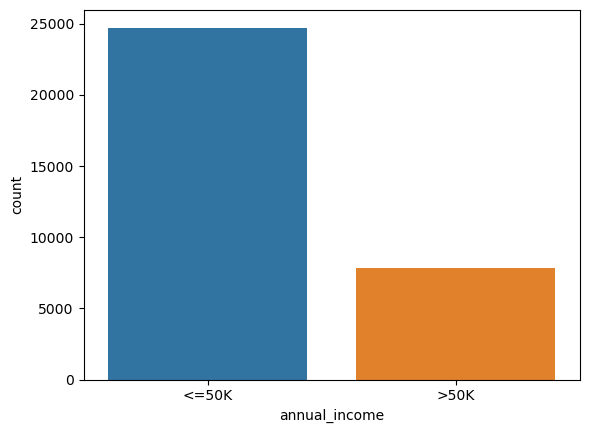

In [15]:
sns.countplot(x='annual_income', data=df)


# Age column

C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\2928176626.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


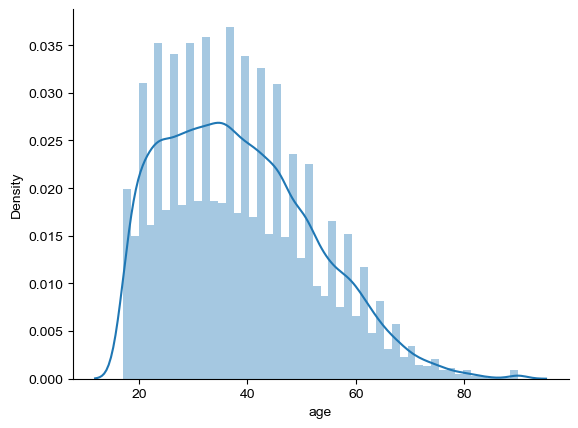

In [16]:
# Create the distribution plot
sns.distplot(df.age)

# Customize the plot (optional)
sns.set_style("darkgrid")
sns.despine()  # Remove axis spines

# Show the plot
plt.show()


# fnlwgt columns 

In [17]:
df.fnlwgt.value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64

C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\120485370.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.fnlwgt)


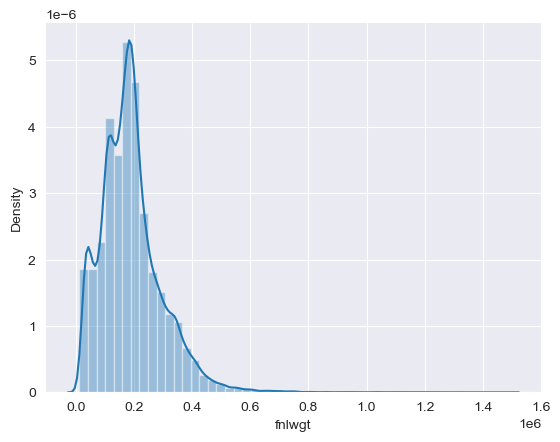

In [18]:
# Create the distribution plot
sns.distplot(df.fnlwgt)

# Customize the plot (optional)
sns.set_style("darkgrid")
sns.despine()  # Remove axis spines

# Show the plot
plt.show()

# Workclass column
While checking the unique values for workclass, we see that we have 7 different types of values, along with some missing values represented by ‘?’. The count of null values is 1836, which is around 5% of the data.

In [19]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'State-gov'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Private'),
  Text(3, 0, 'Federal-gov'),
  Text(4, 0, 'Local-gov'),
  Text(5, 0, '?'),
  Text(6, 0, 'Self-emp-inc'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

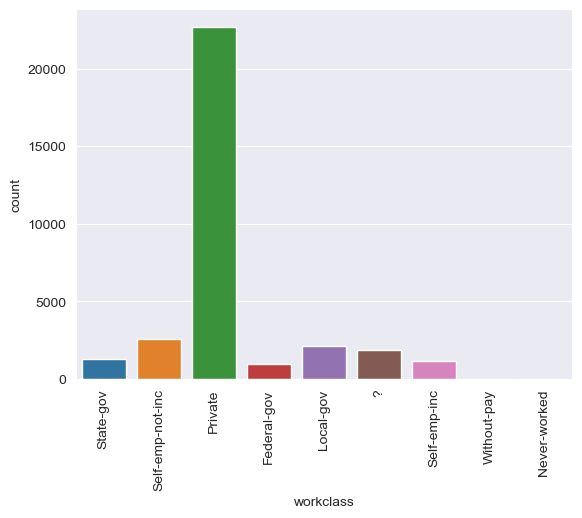

In [20]:
sns.countplot(x='workclass', data=df)
plt.xticks(rotation = 90)

# Education column

In [21]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, 'Assoc-voc'),
  Text(8, 0, '7th-8th'),
  Text(9, 0, 'Doctorate'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, '1st-4th'),
  Text(14, 0, 'Preschool'),
  Text(15, 0, '12th')])

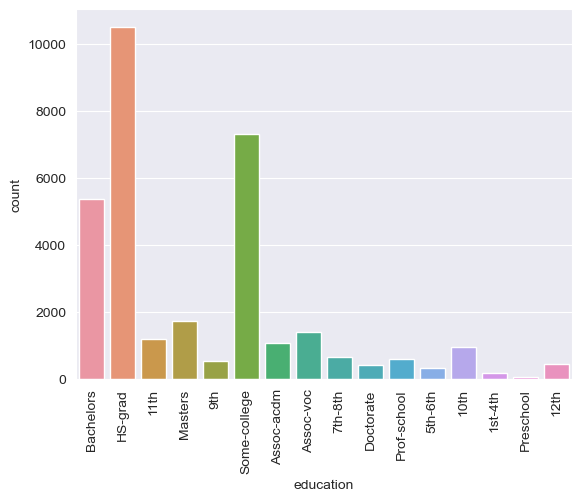

In [22]:
sns.countplot(x='education', data=df)
plt.xticks(rotation = 90)

The ‘Education’ column has 16 different categories available. Majority of these categories belong to ‘School’ type (different classes are divided into multiple categories)

# Education-num column

In [23]:
df.rename(columns={'education-num':'education_num'}, inplace=True)

In [24]:
df.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

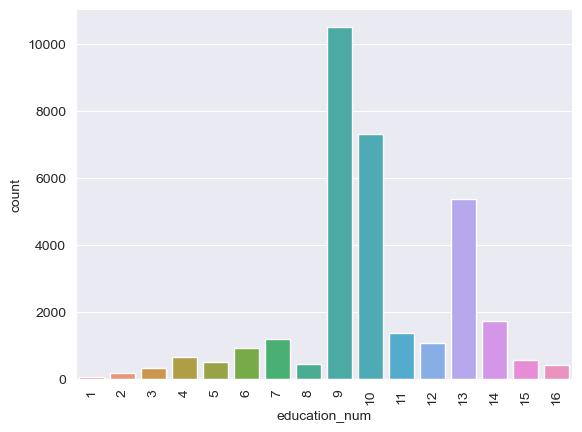

In [25]:
sns.countplot(x='education_num', data=df)
plt.xticks(rotation = 90)

In [26]:
print(df.education_num.value_counts())
print(df.education.value_counts())

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


When we check the division of ‘Education_num’ column, we observe that the count of ‘Education’ column and ‘Education_num’ is exactly same! Which means, the ‘Education_num’ column is providing same information as ‘Education’ column, but in a numeric manner!

# Marital_Status column

In [27]:
df.rename(columns={'marital-status':'marital_status'}, inplace=True)

In [28]:
df.marital_status.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'Divorced'),
  Text(3, 0, 'Married-spouse-absent'),
  Text(4, 0, 'Separated'),
  Text(5, 0, 'Married-AF-spouse'),
  Text(6, 0, 'Widowed')])

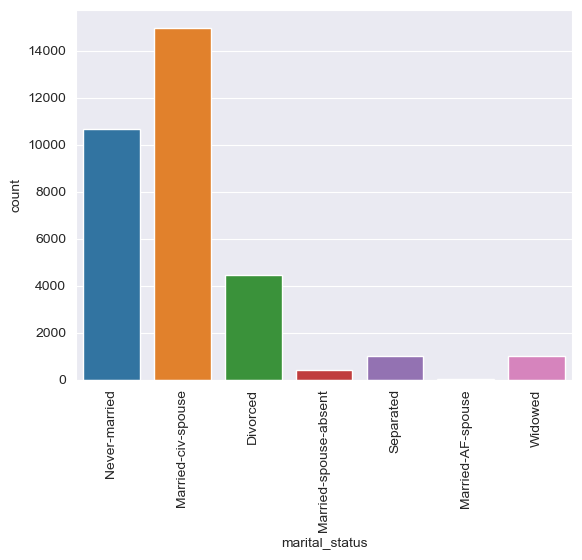

In [29]:
sns.countplot(x='marital_status', data=df)
plt.xticks(rotation = 90)

# Occupation column

In [30]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Craft-repair'),
  Text(7, 0, 'Transport-moving'),
  Text(8, 0, 'Farming-fishing'),
  Text(9, 0, 'Machine-op-inspct'),
  Text(10, 0, 'Tech-support'),
  Text(11, 0, '?'),
  Text(12, 0, 'Protective-serv'),
  Text(13, 0, 'Armed-Forces'),
  Text(14, 0, 'Priv-house-serv')])

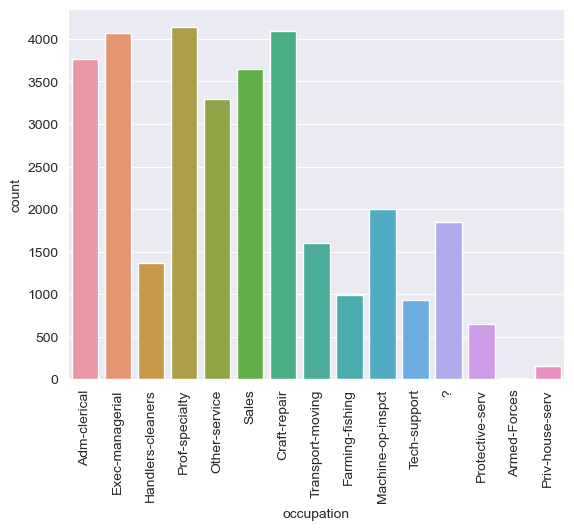

In [31]:
sns.countplot(x='occupation', data=df)
plt.xticks(rotation = 90)

# Relationship column

In [32]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Not-in-family'),
  Text(1, 0, 'Husband'),
  Text(2, 0, 'Wife'),
  Text(3, 0, 'Own-child'),
  Text(4, 0, 'Unmarried'),
  Text(5, 0, 'Other-relative')])

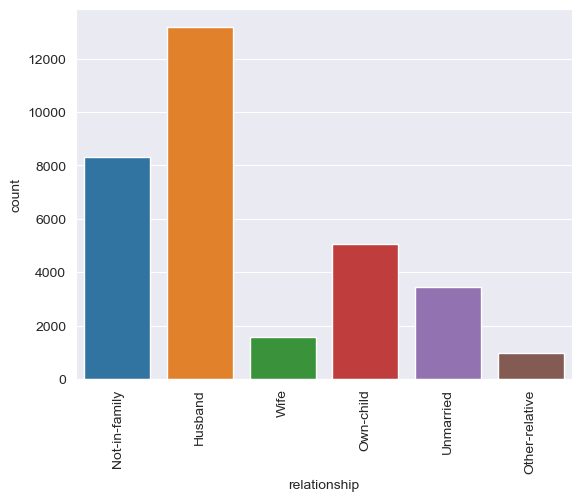

In [33]:
sns.countplot(x='relationship', data=df)
plt.xticks(rotation = 90)

# Race column

In [34]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Amer-Indian-Eskimo'),
  Text(4, 0, 'Other')])

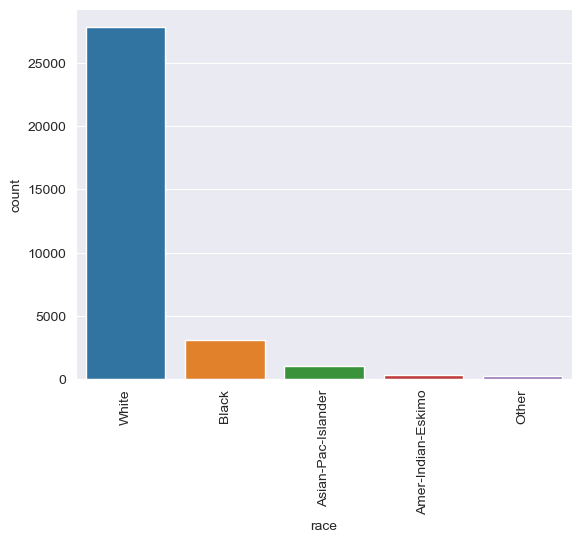

In [35]:
sns.countplot(x='race', data=df)
plt.xticks(rotation = 90)

# Sex column

In [36]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

(array([0, 1]), [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

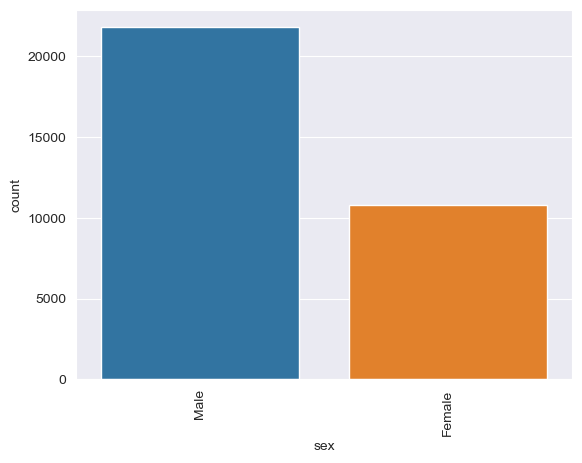

In [37]:
sns.countplot(x='sex', data=df)
plt.xticks(rotation = 90)

# Capital gain column

In [38]:
df.rename(columns={'capital-gain':'capital_gain'}, inplace=True)

In [39]:
df.capital_gain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64

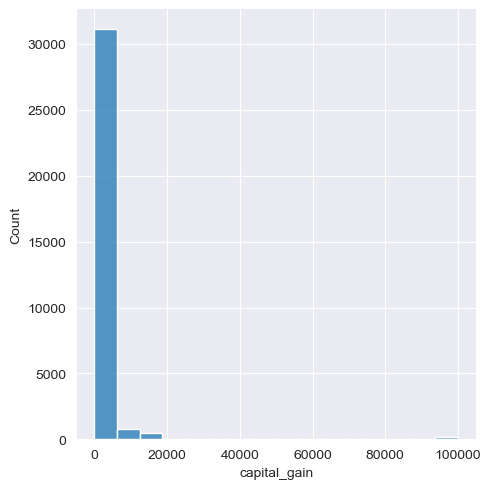

In [40]:
sns.displot(df.capital_gain)


# Capital Loss column

In [41]:
df.rename(columns={'capital-loss':'capital_loss'}, inplace=True)

In [42]:
df.capital_loss.value_counts()

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64

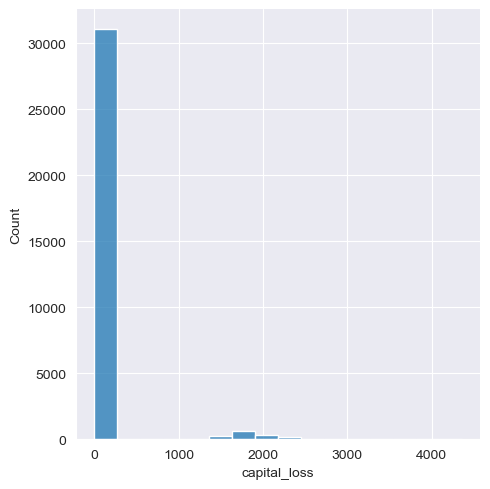

In [43]:
sns.displot(df.capital_loss)

# Hours per week column

In [44]:
df.rename(columns={'hours-per-week':'hours_per_week'}, inplace=True)

C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\1982262482.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.hours_per_week)


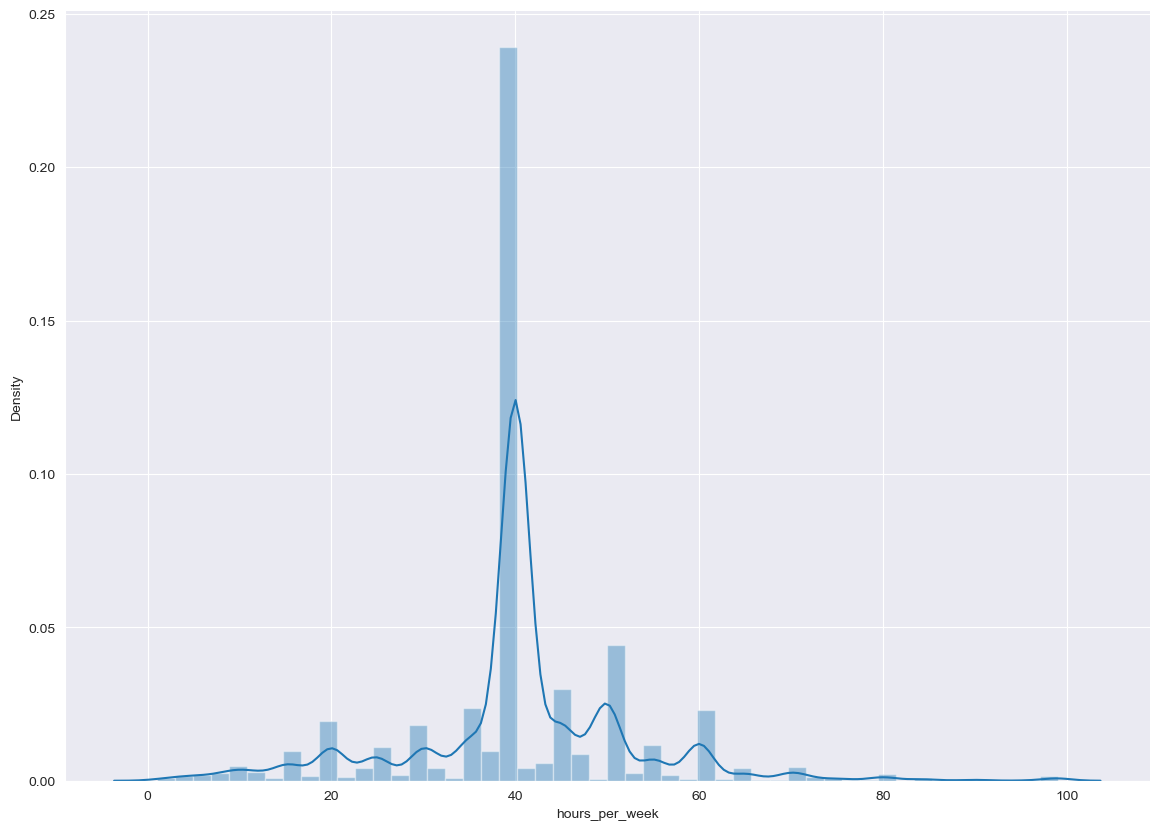

In [45]:
plt.figure(figsize=(14,10))
# Create the distribution plot
sns.distplot(df.hours_per_week)

# Customize the plot (optional)
sns.set_style("darkgrid")
sns.despine()  # Remove axis spines

# Show the plot
plt.show()


# Native_country column

In [46]:
df.rename(columns={'native-country':'native_country'}, inplace=True)

In [47]:
df.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'United-States'),
  Text(1, 0, 'Cuba'),
  Text(2, 0, 'Jamaica'),
  Text(3, 0, 'India'),
  Text(4, 0, '?'),
  Text(5, 0, 'Mexico'),
  Text(6, 0, 'South'),
  Text(7, 0, 'Puerto-Rico'),
  Text(8, 0, 'Honduras'),
  Text(9, 0, 'England'),
  Text(10, 0, 'Canada'),
  Text(11, 0, 'Germany'),
  Text(12, 0, 'Iran'),
  Text(13, 0, 'Philippines'),
  Text(14, 0, 'Italy'),
  Text(15, 0, 'Poland'),
  Text(16, 0, 'Columbia'),
  Text(17, 0, 'Cambodia'),
  Text(18, 0, 'Thailand'),
  Text(19, 0, 'Ecuador'),
  Text(20, 0, 'Laos'),
  Text(21, 0, 'Taiwan'),
  Text(22, 0, 'Haiti'),
  Text(23, 0, 'Portugal'),
  Text(24, 0, 'Dominican-Republic'),
  Text(25, 0, 'El-Salvador'),
  Text(26, 0, 'France'),
  Text(27, 0, 'Guatemala'),
  Text(28, 0, 'China'),
  Text(29, 0, 'Japan'),
  Text(30, 0, 'Yugoslavia'),
  T

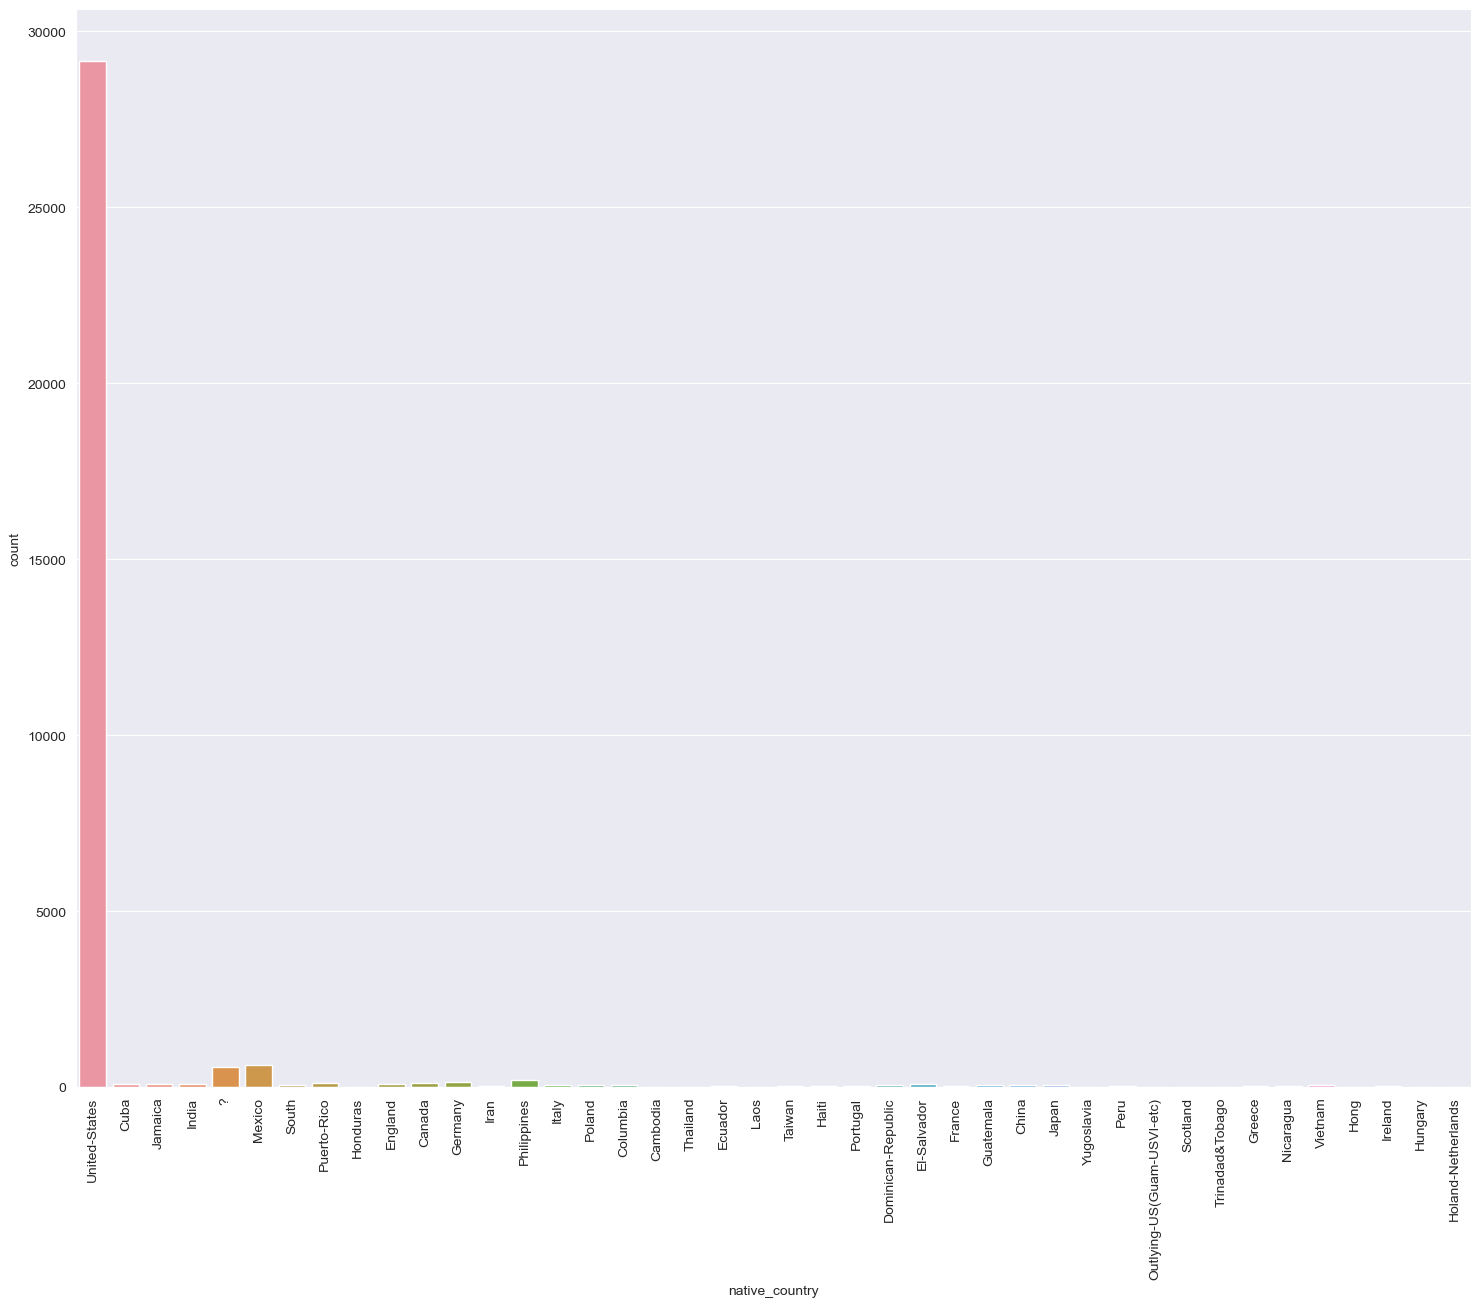

In [48]:
plt.figure(figsize=(18,14))
sns.countplot(x='native_country', data=df)
plt.xticks(rotation = 90)

In [49]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data Cleaning & Wrangling:

In [50]:
#Check for missing values or null-value

In [51]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
annual_income     0
dtype: int64

In [52]:
#find unknown values in categorical colunms

In [53]:
#In this categorica' ?'l colunms i find "?" this unknown value we have to remove this values and replace with null
df=df.replace('?',np.nan)

In [54]:
for col in df.columns:
    if df[col].dtype=="object":
        print(col)
        print(df[col].unique())

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' nan
 'Self-emp-inc' 'Without-pay' 'Never-worked']
education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
marital_status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' nan
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
relationship
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']
race
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
sex
['Male' 'Female']
native_country
['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 

In [55]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
annual_income        0
dtype: int64

In [56]:
#drop null values 

In [57]:
df.dropna(inplace=True)

In [58]:
#find duplicate value's 

In [59]:
df.duplicated().sum()

23

In [60]:
#drop duplicate value's 

In [61]:
df.drop_duplicates(inplace=True)

In [62]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwgt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education_num   30139 non-null  int64 
 5   marital_status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital_gain    30139 non-null  int64 
 11  capital_loss    30139 non-null  int64 
 12  hours_per_week  30139 non-null  int64 
 13  native_country  30139 non-null  object
 14  annual_income   30139 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [64]:
#Deal with outliers

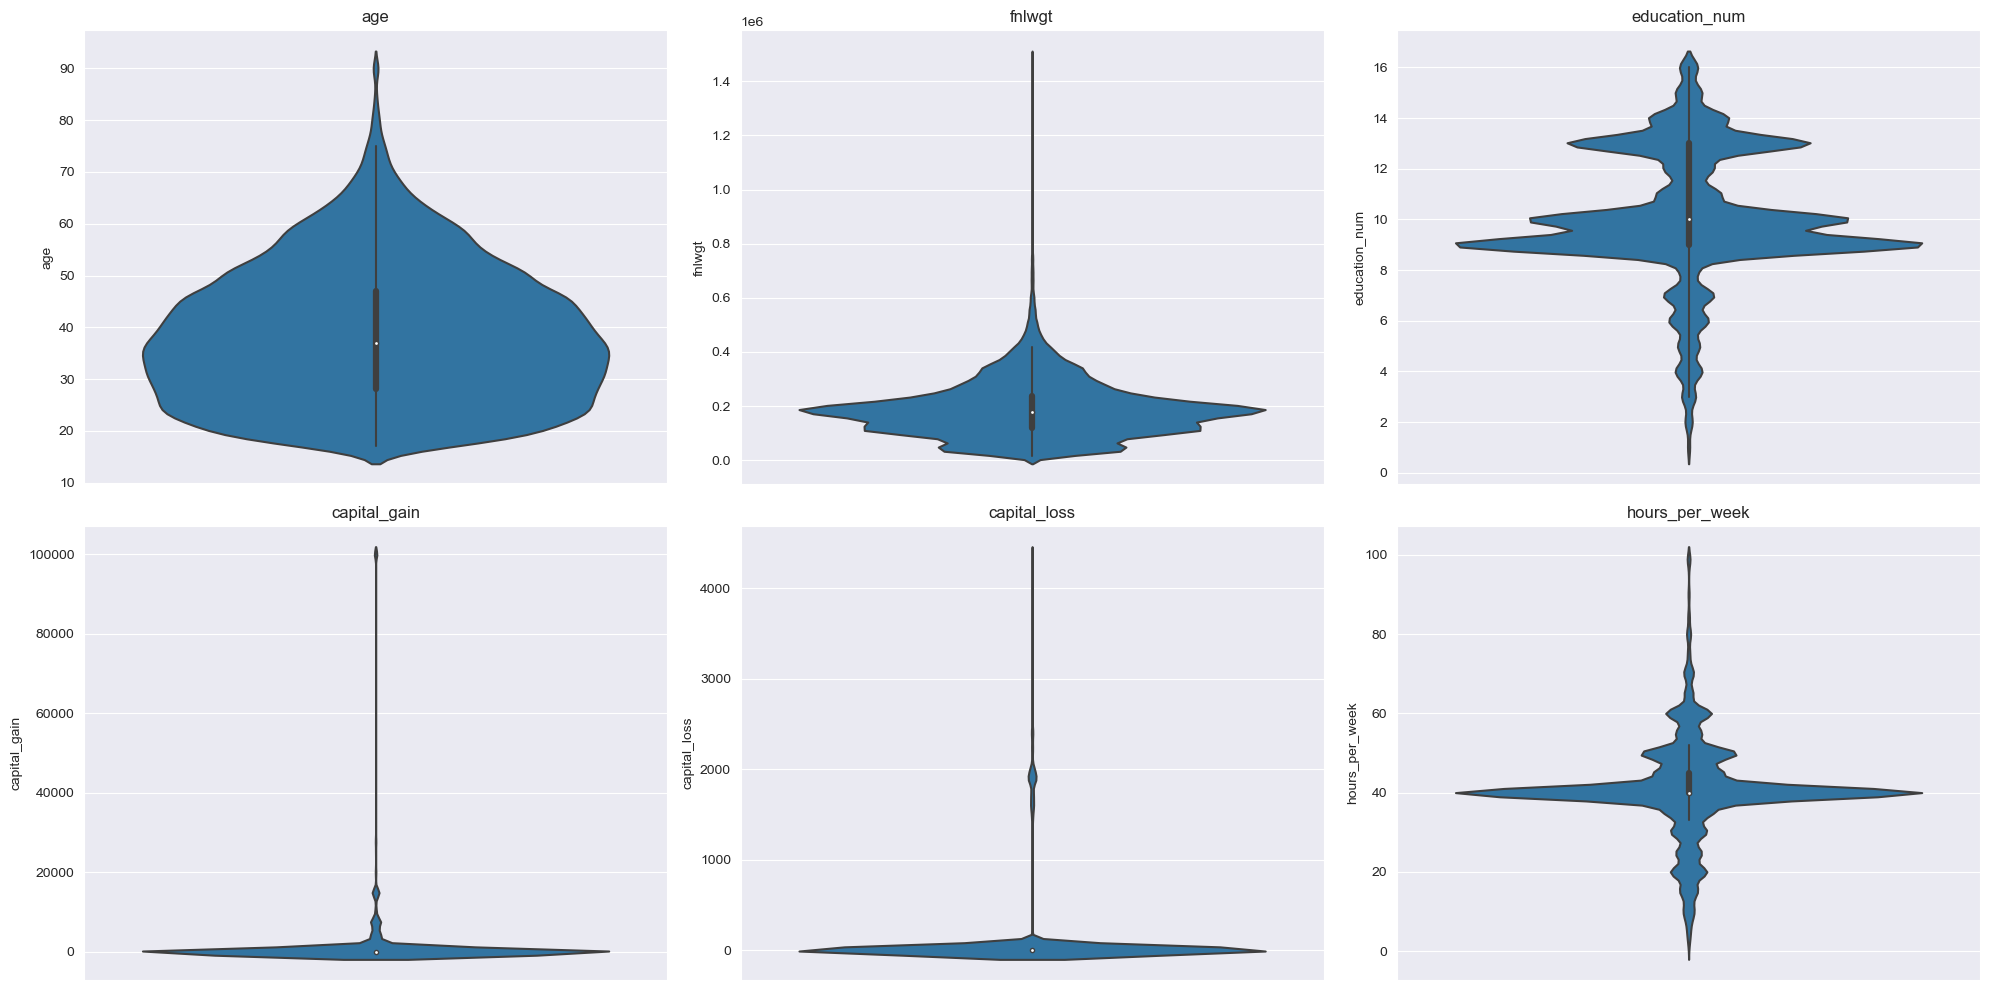

In [65]:
# Assuming df is your loaded dataframe
cols = df.select_dtypes(include=['int64','float64'])  # Select numerical columns

f, axes = plt.subplots(2,3, figsize=(20, 10))  # Adjust these as needed

for i, col in enumerate(cols.columns):
    plot_row, plot_col = divmod(i, 3)  # Determine plot position in the grid
    s = sns.violinplot(y=df[col], ax=axes[plot_row, plot_col])
    axes[plot_row, plot_col].set_title(col)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


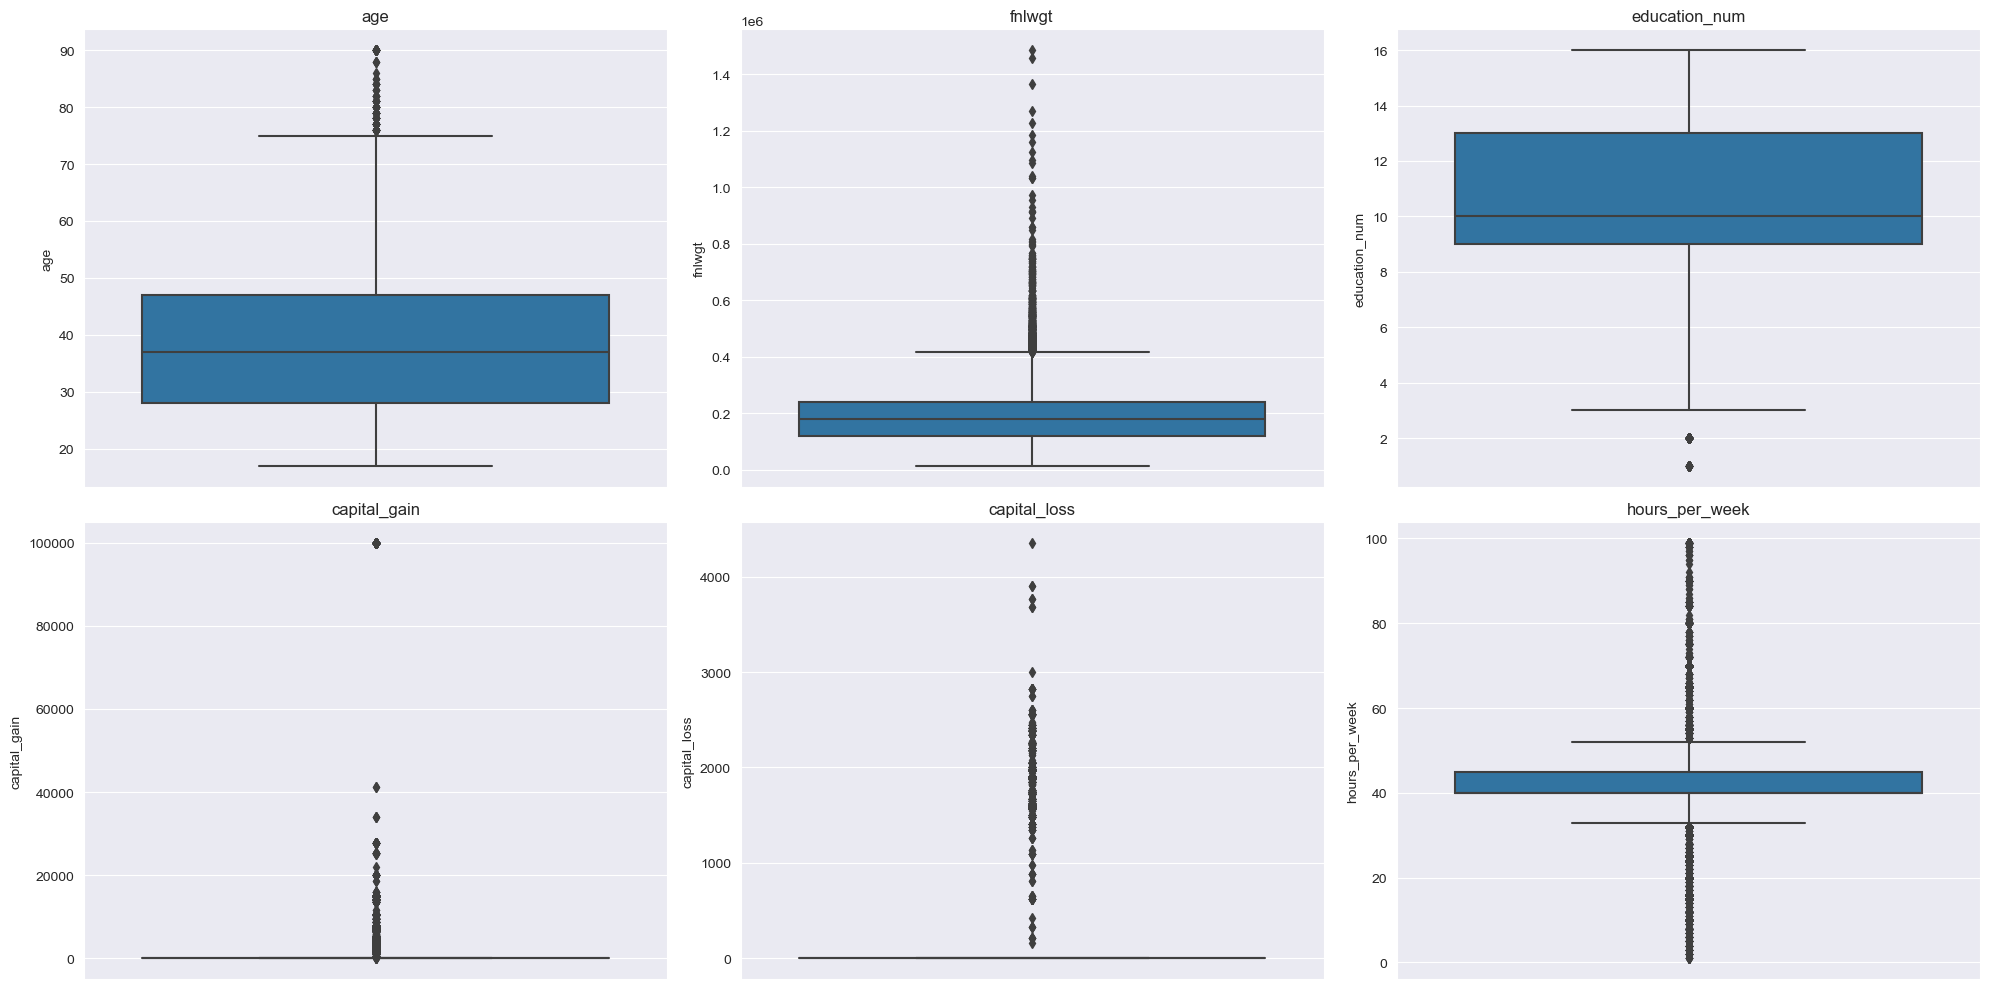

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your loaded dataframe
cols = df.select_dtypes(include=['int64', 'float64'])  # Select numerical columns

f, axes = plt.subplots(2,3, figsize=(20, 10))  # Adjust these as needed

for i, col in enumerate(cols.columns):
    plot_row, plot_col = divmod(i, 3)  # Determine plot position in the grid
    s = sns.boxplot(y=df[col], ax=axes[plot_row, plot_col])
    axes[plot_row, plot_col].set_title(col)

plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [67]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'annual_income'],
      dtype='object')

In [68]:
remove = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
        'native_country',
       'annual_income']

In [69]:
for i in remove:
    if df[i].dtype!="object":
        p1=df[i].quantile(0.01)
        p2=df[i].quantile(0.99)
        df[i][df[i]<p1]=p1
        df[i][df[i]>p2]=p2

C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\3351259877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<p1]=p1
C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\3351259877.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]>p2]=p2
C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\3351259877.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][df[i]<p1]=p1
C:\Users\Pragati Pa

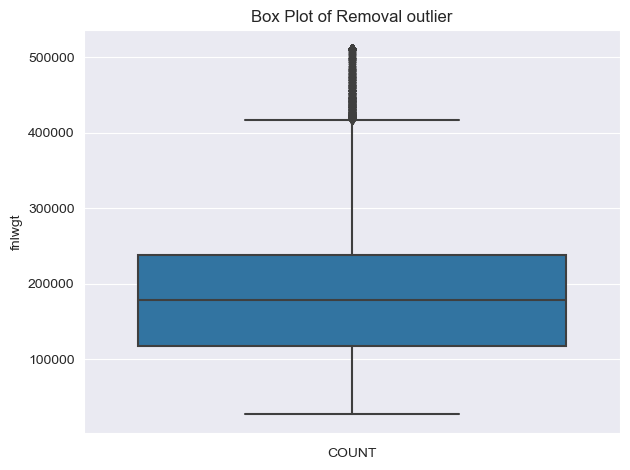

In [70]:
sns.boxplot(y=df['fnlwgt'])

# Customize labels and title
plt.ylabel('fnlwgt')
plt.xlabel('COUNT')
plt.title('Box Plot of Removal outlier')
            
plt.tight_layout()  # Adjust spacing between plots
plt.show()


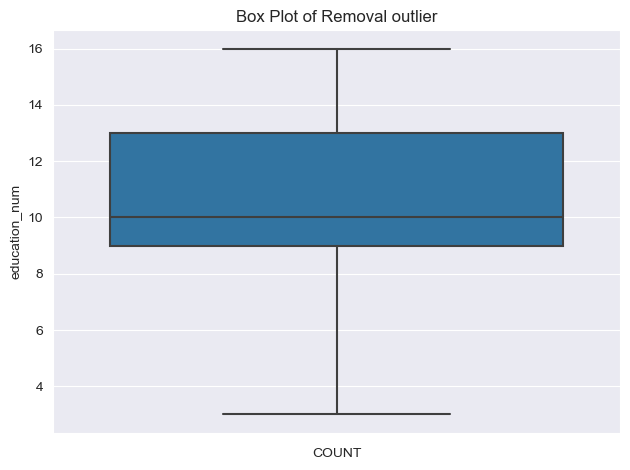

In [71]:
sns.boxplot(y=df['education_num'])

# Customize labels and title
plt.ylabel('education_num')
plt.xlabel('COUNT')
plt.title('Box Plot of Removal outlier')
            
plt.tight_layout()  # Adjust spacing between plots
plt.show()


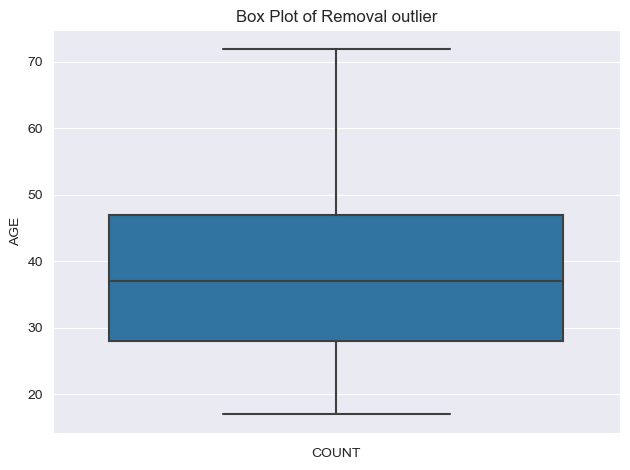

In [72]:
sns.boxplot(y=df['age'])

# Customize labels and title
plt.ylabel('AGE')
plt.xlabel('COUNT')
plt.title('Box Plot of Removal outlier')
            
plt.tight_layout()  # Adjust spacing between plots
plt.show()


In [73]:
df.skew()

C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


age                0.437185
fnlwgt             0.799728
education_num     -0.231244
capital_gain      11.898104
capital_loss       4.524409
hours_per_week     0.332386
dtype: float64

In [74]:
print(df["capital_gain"].describe())
print('---------------')
print(df["capital_loss"].describe())

count    30139.000000
mean      1092.841202
std       7409.110596
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64
---------------
count    30139.000000
mean        88.439928
std        404.445239
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64


In [75]:
cgain=df["capital_gain"].unique()
cgain

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  2463,
        3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,  6514,
        1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,  6767,
        2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,  3818,
         914,   401,  2829,  2977,  4934,  2062,  2354,  3464,  5455,
       15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430, 34095,
        6497,  3908,   114,  2346,  2907,  1151,  9386,  2414,  2290,
        3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,  7896,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086], dtype=int64)

In [76]:
closs = df["capital_loss"].unique()
closs

array([   0, 2042, 1408, 1902, 1887, 1719, 1762, 1564, 2179, 1816, 1980,
       1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721, 2051,
       2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628, 1848,
       2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444, 1138,
       2238,  625,  213, 1539,  880, 1668, 1092, 1594, 2231, 1844,  810,
       2824, 2559, 2057, 1573, 1974,  974, 2174, 2149, 1735, 1258, 2603,
       2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683, 2129, 4356,
       2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754, 2472,
       3004, 1411], dtype=int64)

In [77]:
print("percentage of zeros in “capital_gain” is",round((df["capital_gain"].isin([0]).sum() / df["capital_gain"].shape[0]) * 100),"%")

percentage of zeros in “capital_gain” is 92 %


In [78]:
print("percentage of zeros in “capital_loss” is",round((df["capital_loss"].isin([0]).sum() / df["capital_loss"].shape[0]) * 100),"%") 

percentage of zeros in “capital_loss” is 95 %


In [79]:
# Calculate mean capital gain with zero values
mean_capital_gain1 = df['capital_gain'].mean()

# Calculate mean capital loss with zero values
mean_capital_loss1 = df['capital_loss'].mean()

# Calculate mean capital gain for nonzero values
mean_capital_gain2 = df[df['capital_gain'] > 0]['capital_gain'].mean()

# Calculate mean capital loss for nonzero values
mean_capital_loss2 = df[df['capital_loss'] > 0]['capital_loss'].mean()

# Create a DataFrame with results
result_df = pd.DataFrame({'GainZERO': [mean_capital_gain1],
                           'LOSSnonZERO': [mean_capital_loss2],
                                     'LossZERO':[mean_capital_loss1],
                                     'GainnonZERO':[mean_capital_gain2]})


In [80]:
#mean values of “capital_gain” and “capital_loss” with the zero and without zero, respectively:
result_df 

,GainZERO,LOSSnonZERO,LossZERO,GainnonZERO
0,1092.841202,1867.898388,88.439928,12977.596927


In [81]:
# Filter non-zero values
df_gain = df.loc[df['capital_gain'] > 0]
df_loss = df.loc[df['capital_loss'] > 0]

# Calculate IQR
iqr_gain = df_gain['capital_gain'].quantile(0.75) - df_gain['capital_gain'].quantile(0.25)
iqr_loss = df_loss['capital_loss'].quantile(0.75) - df_loss['capital_loss'].quantile(0.25)

# Calculate quartiles using numpy.linspace for even spacing
import numpy as np
q_gain = df_gain['capital_gain'].quantile(np.linspace(0, 1, 5))  # 5 quartiles
q_loss = df_loss['capital_loss'].quantile(np.linspace(0, 1, 5))

# Create a DataFrame with results
result_df_iqr = pd.DataFrame({'Capital_Gain': q_gain, 'Capital_Loss': q_loss})


In [82]:
#Quantiles of the Nonzero Capital
result_df_iqr

,Capital_Gain,Capital_Loss
0.00,114.0,155.0
0.25,3464.0,1672.0
0.50,7298.0,1887.0
0.75,14084.0,1977.0
1.00,99999.0,4356.0


In [83]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [84]:
# IQR of the Nonzero Capital
result = pd.DataFrame({'IQR_Capital_Gain': [iqr_gain],
                           'IQR_Capital_Loss': [iqr_loss]})
result

,IQR_Capital_Gain,IQR_Capital_Loss
0,10620.0,305.0


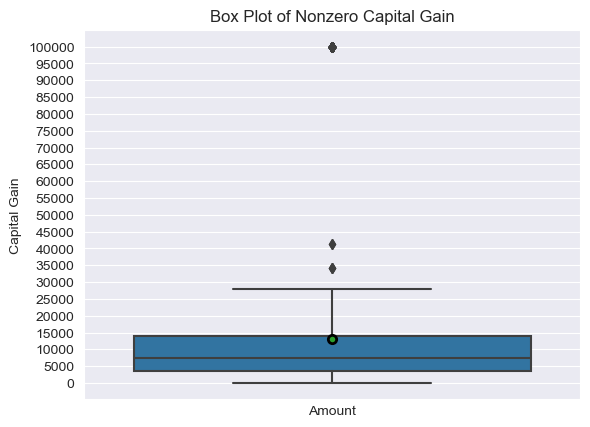

In [85]:
# Assuming you have already loaded your data into a DataFrame called 'df'
# Filter non-zero values
df_filtered = df[df['capital_gain'] > 0]

# Create the box plot using seaborn
sns.boxplot(
    y='capital_gain',
    showmeans=True,  # Add mean as point
    meanprops={"marker": "o", "color": "red", "mec": "black", "mew": 2},  # Customize mean point
    data=df_filtered
)

# Customize labels and title
plt.ylabel('Capital Gain')
plt.xlabel('Amount')
plt.title('Box Plot of Nonzero Capital Gain')

# Remove x-axis ticks labels (equivalent to scale_x_discrete(breaks = NULL))
plt.xticks([])

# Customize y-axis breaks (equivalent to scale_y_continuous(breaks = seq(0, 100000, 5000)))
plt.yticks(range(0, 100001, 5000))

# Display the plot
plt.show()


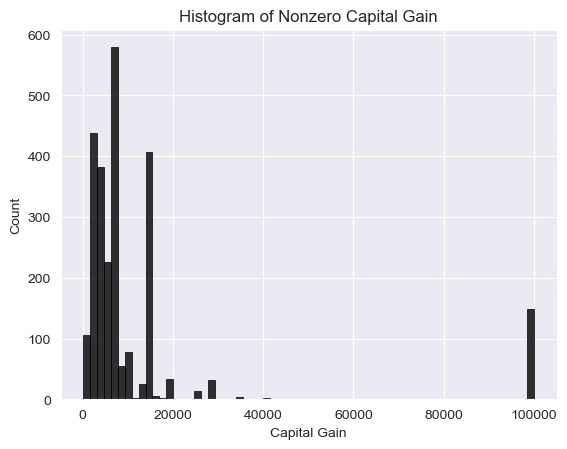

In [86]:
# Filter nonzero values
df_filtered = df.loc[df['capital_gain'] > 0]

# Create the histogram
sns.histplot(
    data=df_filtered,
    x="capital_gain",
    #binwidth=5000,
    color="black",
    edgecolor="black",
    alpha=0.8,
    linewidth=0.5,
    kde=False,  # Remove kernel density estimation for clarity
)

# Customize appearance (if needed)
plt.title("Histogram of Nonzero Capital Gain")
plt.xlabel("Capital Gain")
plt.ylabel("Count")
plt.show()


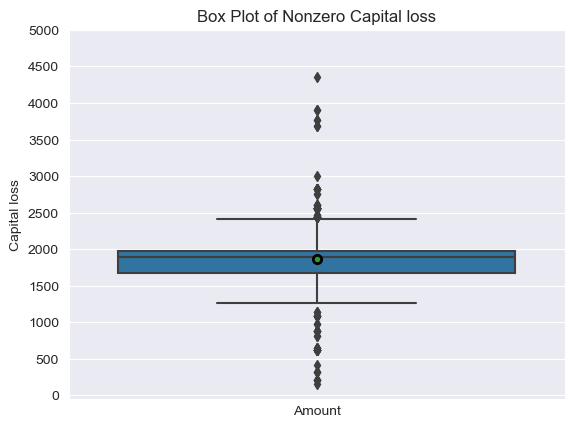

In [87]:
# Assuming you have already loaded your data into a DataFrame called 'df'
# Filter non-zero values
df_filtered = df[df['capital_loss'] > 0]

# Create the box plot using seaborn
sns.boxplot(
    y='capital_loss',
    showmeans=True,  # Add mean as point
    meanprops={"marker": "o", "color": "red", "mec": "black", "mew": 2},  # Customize mean point
    data=df_filtered
)

# Customize labels and title
plt.ylabel('Capital loss')
plt.xlabel('Amount')
plt.title('Box Plot of Nonzero Capital loss')

# Remove x-axis ticks labels (equivalent to scale_x_discrete(breaks = NULL))
plt.xticks([])

# Customize y-axis breaks (equivalent to scale_y_continuous(breaks = seq(0, 100000, 5000)))
plt.yticks(range(0, 5001, 500))

# Display the plot
plt.show()



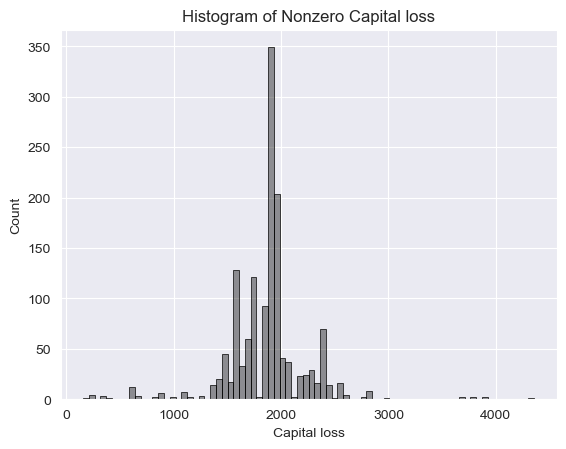

In [88]:
# Filter nonzero values
df_filtered = df.loc[df['capital_loss'] > 0]

# Create the histogram
sns.histplot(
    data=df_filtered,
    x="capital_loss",
    #binwidth=5000,
    color="black",
    edgecolor="black",
    alpha=0.4,
    linewidth=0.5,
    kde=False,
    #bins=20
    # Remove kernel density estimation for clarity
)

# Customize appearance (if needed)
plt.title("Histogram of Nonzero Capital loss")
plt.xlabel("Capital loss")
plt.ylabel("Count")
plt.show()

# Capital gain:

We mark all values of “capital_gain” which are less than the first quartile of the nonzero capital gain (which is equal to 3464) as “Low”; all values that are between the first and third quartile (between 3464 and 14080) - as “Medium”; and all values greater than or equal to the third quartile are marked as “High”.

In [89]:
# Define a function to categorize capital gain
def categorize_gain(gain):
    if gain < 3464:
        return "Low"
    elif gain >= 3464 and gain <= 14080:
        return "Medium"
    else:
        return "High"

# Add a new column with categorized capital gain
df['capital_gain'] = df['capital_gain'].apply(categorize_gain)

# Convert 'cap_gain' to an ordered categorical variable
df['capital_gain'] = pd.Categorical(df['capital_gain'], categories=['Low', 'Medium', 'High'], ordered=True)

# Capital loss:

We mark all values of “capital_loss” which are less than the first quartile of the nonzero capital gain (which is equal to 1672) as “Low”; all values that are between the first and third quartile (between 1672 and 1977) - as “Medium”; and all values greater than or equal to the third quartile are marked as “High”.

In [90]:
# Define a function to categorize capital gain
def categorize_gain(loss):
    if loss < 1672:
        return "Low"
    elif loss >= 1672 and loss <= 1977:
        return "Medium"
    else:
        return "High"

# Add a new column with categorized capital gain
df['capital_loss'] = df['capital_loss'].apply(categorize_gain)

# Convert 'cap_gain' to an ordered categorical variable
df['capital_loss'] = pd.Categorical(df['capital_loss'], categories=['Low', 'Medium', 'High'], ordered=True)

# Hours per week column

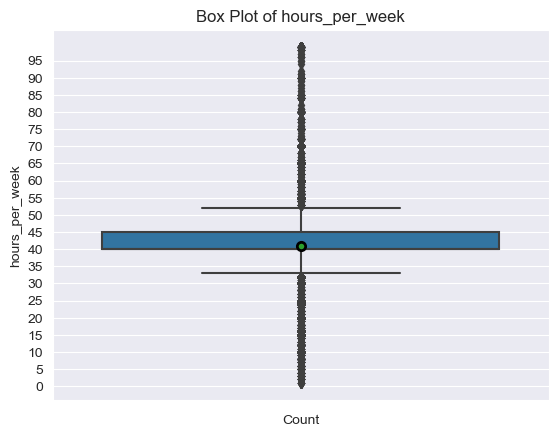

In [91]:
# Create the box plot using seaborn
sns.boxplot(
    y='hours_per_week',
    showmeans=True,  # Add mean as point
    meanprops={"marker": "o", "color": "red", "mec": "black", "mew": 2},  # Customize mean point
    data=df
)
plt.yticks(range(0, 100, 5))
# Customize labels and title
plt.ylabel('hours_per_week')
plt.xlabel('Count')
plt.title('Box Plot of hours_per_week')

# Display the plot
plt.show()


In [92]:
# Define categorization function
def categorize_hours(hours_per_week):
    if hours_per_week < 40:
        return "less_than_40"
    elif 40 <= hours_per_week <= 45:
        return "between_40_and_45"
    elif 45 < hours_per_week <= 60:
        return "between_45_and_60"
    elif 60 < hours_per_week <= 80:
        return "between_60_and_80"
    else:
        return "more_than_80"

# Apply categorization using vectorized approach
df['hours_per_week'] = df['hours_per_week'].apply(categorize_hours)

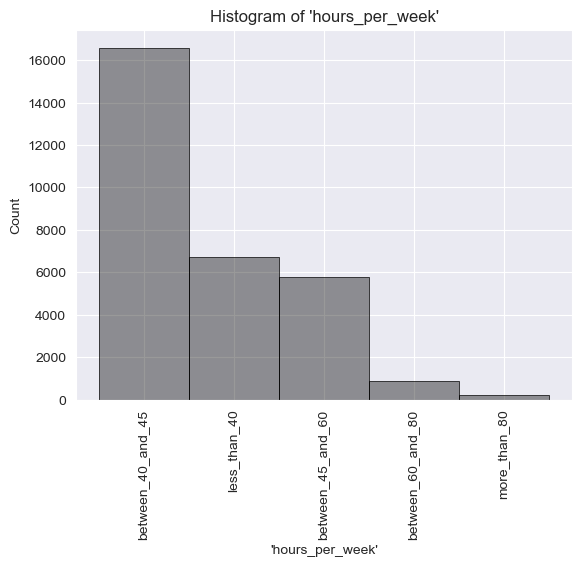

In [95]:
# Create the histogram
sns.histplot(
    data=df,
    x='hours_per_week',
    #binwidth=5000,
    color="black",
    edgecolor="black",
    alpha=0.4,
    linewidth=0.5,
    kde=False,
    #bins=20
    # Remove kernel density estimation for clarity
)
plt.xticks(rotation = 90)
# Customize appearance (if needed)
plt.title("Histogram of 'hours_per_week'")
plt.xlabel("'hours_per_week'")
plt.ylabel("Count")
plt.show()

In [96]:
df['hours_per_week'].unique()

array(['between_40_and_45', 'less_than_40', 'between_45_and_60',
       'between_60_and_80', 'more_than_80'], dtype=object)

In [97]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,State-gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,Low,Low,between_40_and_45,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,less_than_40,United-States,<=50K
2,38,Private,215646.0,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,Low,Low,between_40_and_45,United-States,<=50K
3,53,Private,234721.0,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,between_40_and_45,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,between_40_and_45,Cuba,<=50K


# Combining the data logically to reduce categories -

# workclass column

In [98]:
df.workclass.value_counts()

Private             22264
Self-emp-not-inc     2498
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: workclass, dtype: int64

In [99]:
mapping = {
    "Private":"Private",
    "Self-emp-not-inc":"Private",
    "Local-gov":"Gov",
    "State-gov":"Gov",
    "Self-emp-inc":"Self-emp-inc",
    "Federal-gov":"Federal-gov",
    "Without-pay":"Without-pay"
    
}

df["workclass"]=df["workclass"].replace(to_replace=mapping)

In [100]:
df.workclass.value_counts()

Private         24762
Gov              3346
Self-emp-inc     1074
Federal-gov       943
Without-pay        14
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Gov'),
  Text(1, 0, 'Private'),
  Text(2, 0, 'Federal-gov'),
  Text(3, 0, 'Self-emp-inc'),
  Text(4, 0, 'Without-pay')])

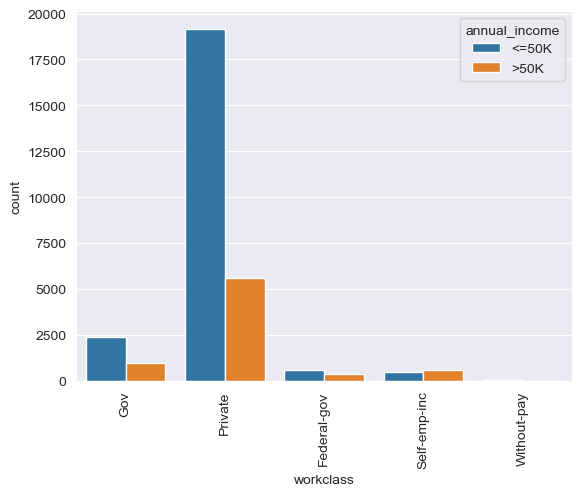

In [101]:
sns.countplot(x='workclass', data=df, hue="annual_income")
plt.xticks(rotation = 90)

# Education column

In [102]:
df.education.value_counts()

HS-grad         9834
Some-college    6669
Bachelors       5042
Masters         1626
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          556
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          287
1st-4th          149
Preschool         44
Name: education, dtype: int64

In [103]:
mapping = {
    "11th":"School",
    "10th":"School",
    "7th-8th":"School",
    "9th":"School",
     "12th":"School",
     "5th-6th":"School",
    "1st-4th":"School",
    "Preschool":"School",
    "Assoc-voc":"Assoc",
    "Assoc-acdm":"Assoc",
    "HS-grad":"Collage",
    "Some-college":"Collage",
    "Doctorate":"Doctorate",
    "Prof-school":"Doctorate"
    
}

df['education']=df['education'].replace(to_replace=mapping)

In [104]:
df.education.value_counts()

Collage      16503
Bachelors     5042
School        3736
Assoc         2315
Masters       1626
Doctorate      917
Name: education, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'Collage'),
  Text(2, 0, 'School'),
  Text(3, 0, 'Masters'),
  Text(4, 0, 'Assoc'),
  Text(5, 0, 'Doctorate')])

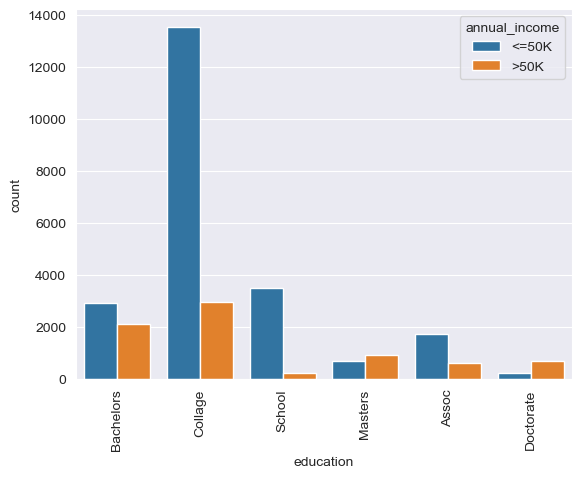

In [105]:
sns.countplot(x='education', data=df,hue="annual_income")
plt.xticks(rotation = 90)

# marital_status column

In [106]:
df.marital_status.value_counts()

Married-civ-spouse       14059
Never-married             9711
Divorced                  4212
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital_status, dtype: int64

In [107]:
mapping = {
    "Married-civ-spouse": "Married-civ-spouse",
    "Never-married": "Never-married",
    "Divorced": 'No spouse',
    "Separated": 'No spouse',
    "Widowed": 'No spouse',
    "Married-spouse-absent": 'No spouse',
    "Married-AF-spouse": 'No spouse',
}

df['marital_status']=df['marital_status'].replace(to_replace=mapping)

In [108]:
df.marital_status.value_counts()

Married-civ-spouse    14059
Never-married          9711
No spouse              6369
Name: marital_status, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Never-married'),
  Text(1, 0, 'Married-civ-spouse'),
  Text(2, 0, 'No spouse')])

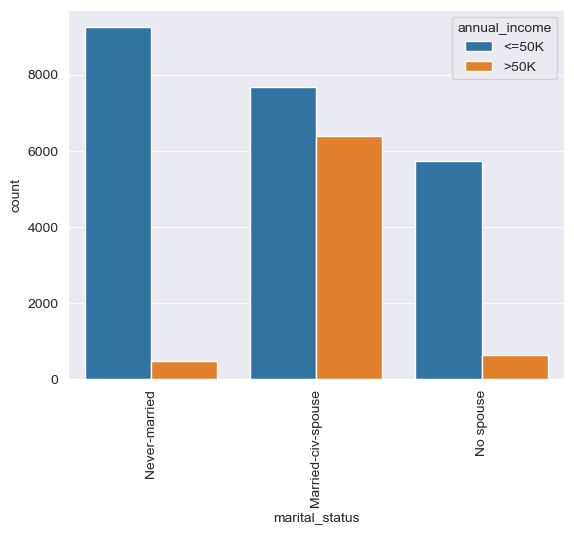

In [109]:
sns.countplot(x='marital_status', data=df,hue="annual_income")
plt.xticks(rotation = 90)

# relationship column

In [110]:
df.relationship.value_counts()

Husband           12457
Not-in-family      7714
Own-child          4462
Unmarried          3211
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

In [111]:
mapping ={
    "Not-in-family":"Other",
    "Own-child":"Other",
    "Unmarried":"Other",
    "Other-relative":"Other",
    
}

df['relationship']=df['relationship'].replace(to_replace=mapping)

In [112]:
df.relationship.value_counts()

Other      16276
Husband    12457
Wife        1406
Name: relationship, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Other'), Text(1, 0, 'Husband'), Text(2, 0, 'Wife')])

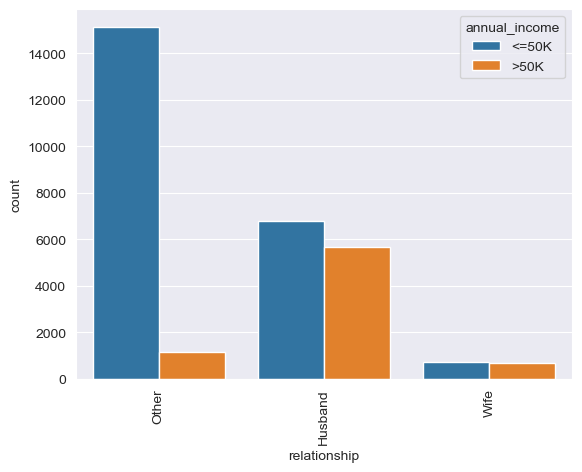

In [113]:
sns.countplot(x='relationship', data=df,hue="annual_income")
plt.xticks(rotation = 90)

# Race column

In [114]:
df.race.value_counts()

White                 25912
Black                  2816
Asian-Pac-Islander      894
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

In [115]:
mapping = {
    "Amer-Indian-Eskimo":"Other",
    "Other":"Other"
}

df["race"]=df["race"].replace(to_replace=mapping)

In [116]:
df.race.value_counts()

White                 25912
Black                  2816
Asian-Pac-Islander      894
Other                   517
Name: race, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other')])

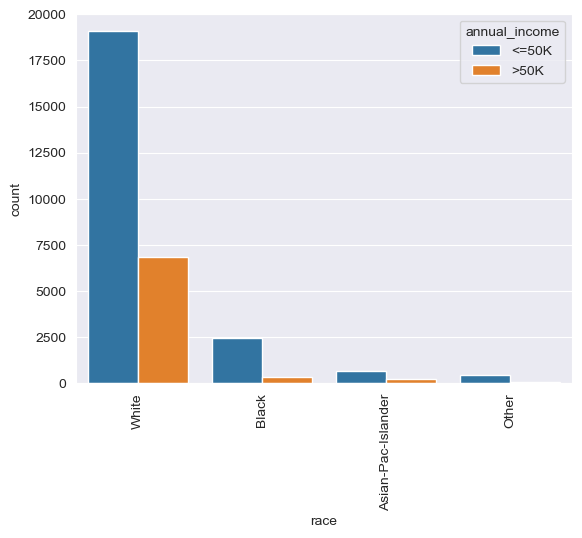

In [117]:
sns.countplot(x='race', data=df,hue="annual_income")
plt.xticks(rotation = 90)

# Data visualization with target column 

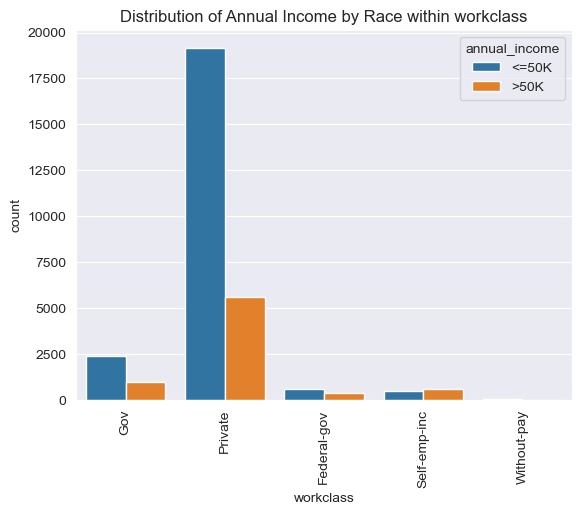

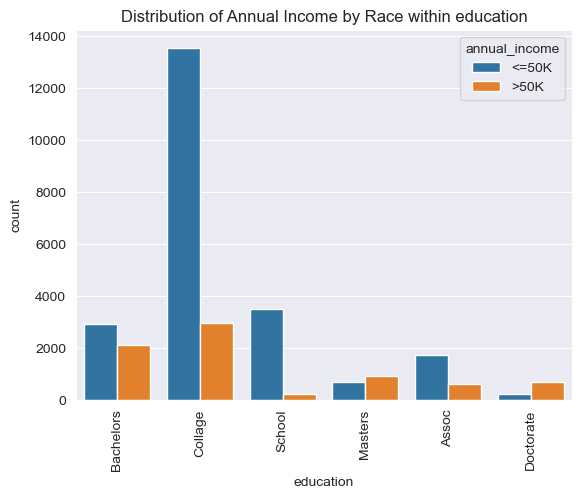

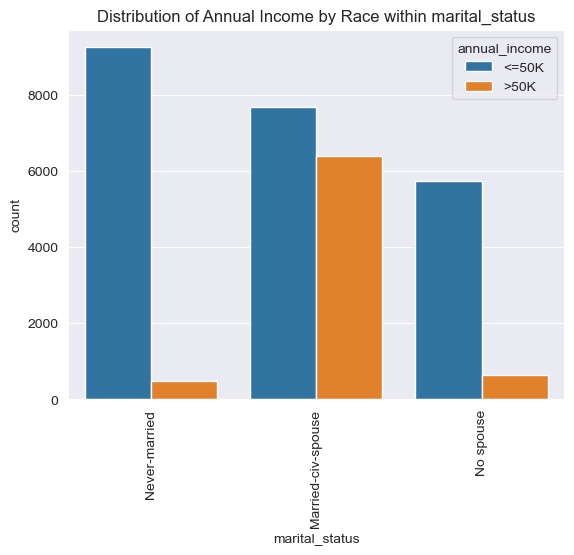

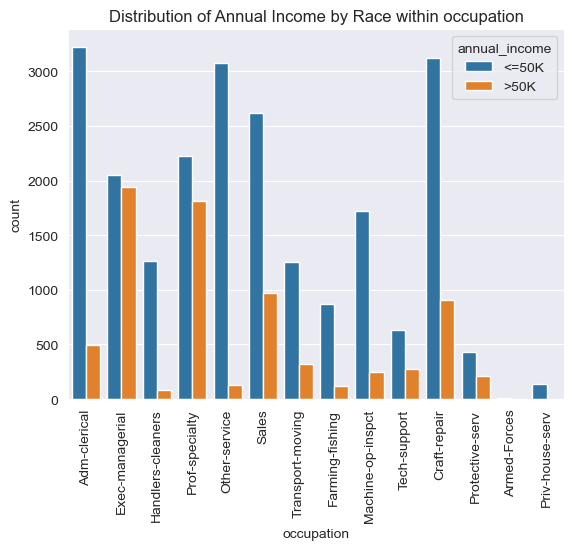

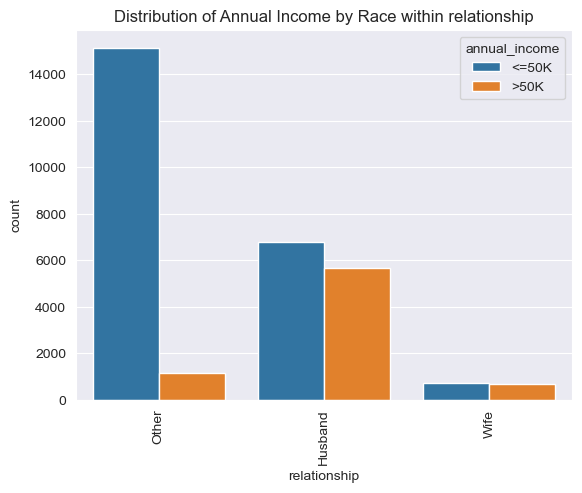

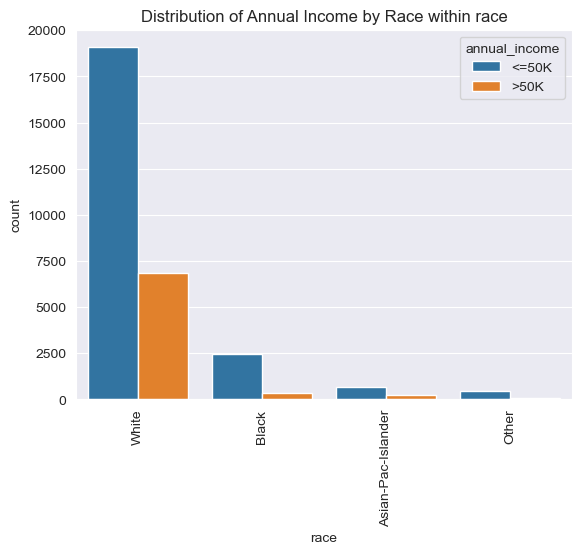

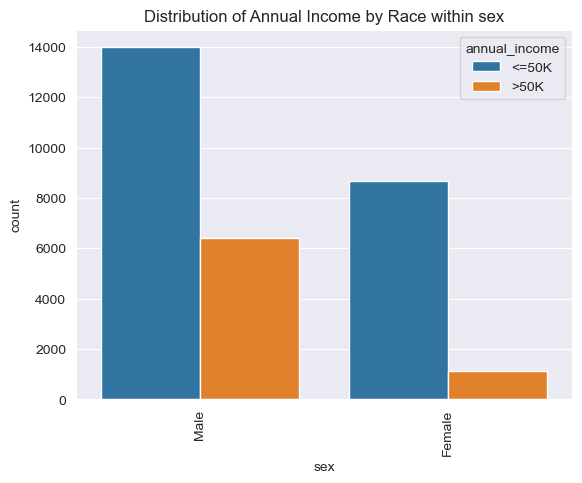

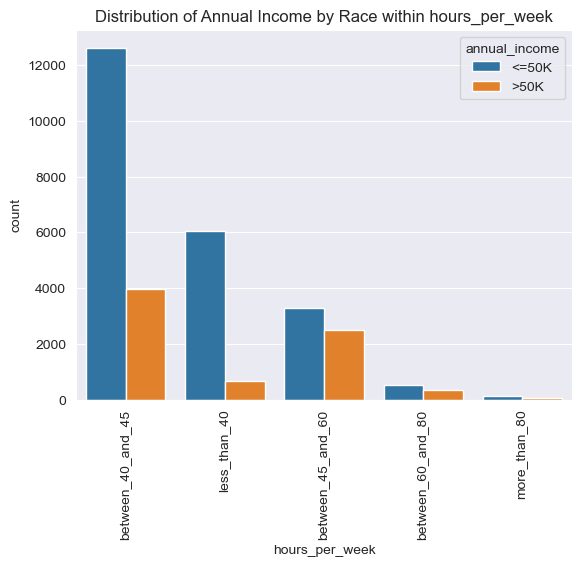

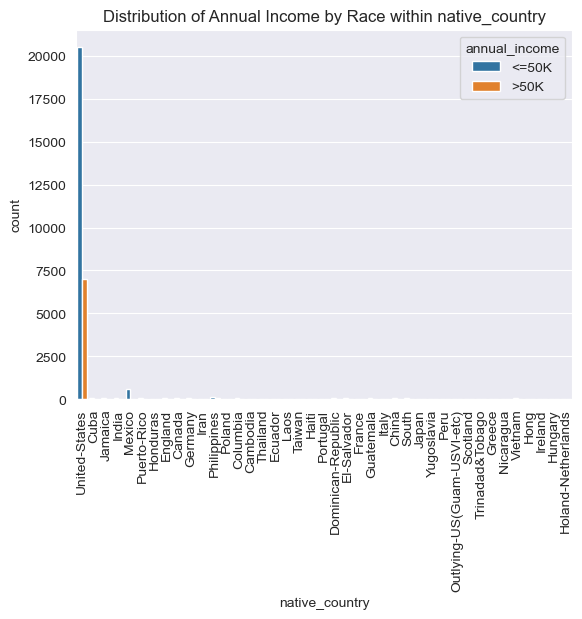

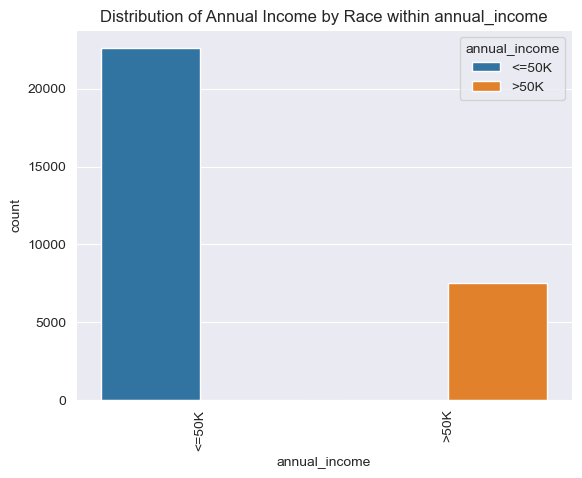

In [118]:
# Assuming you have your DataFrame `df` prepared

object_cols = df.select_dtypes(include=['object'])  # Get object columns

for col in object_cols:
    sns.countplot(x=col, data=df, hue="annual_income")
    plt.xticks(rotation=90)
    plt.title(f"Distribution of Annual Income by Race within {col}")
    plt.show()  # Or save the plot as needed


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


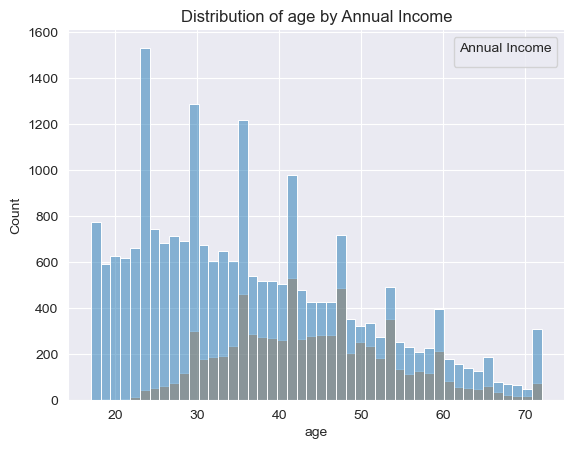

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


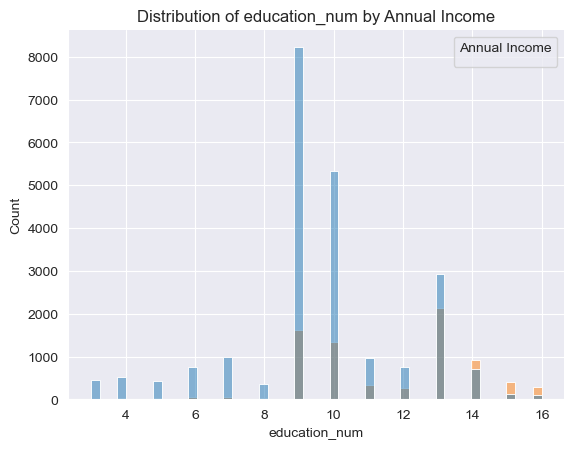

In [119]:

integer_cols = df.select_dtypes(include=['int64'])

for col in integer_cols:
    sns.histplot(x=col, data=df, hue="annual_income")  # Use 'annual_income' for demonstration, replace with appropriate data

    # Customize the plot
    sns.set_style("darkgrid")
    sns.despine()  # Remove axis spines
    plt.title(f"Distribution of {col} by Annual Income")
    plt.legend(title="Annual Income")

    # Show or save the plot
    plt.show()  # Or: plt.savefig(f"histplot_{col}.png")


In [120]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,Gov,77516.0,Bachelors,13,Never-married,Adm-clerical,Other,White,Male,Low,Low,between_40_and_45,United-States,<=50K
1,50,Private,83311.0,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,Low,Low,less_than_40,United-States,<=50K
2,38,Private,215646.0,Collage,9,No spouse,Handlers-cleaners,Other,White,Male,Low,Low,between_40_and_45,United-States,<=50K
3,53,Private,234721.0,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,Low,Low,between_40_and_45,United-States,<=50K
4,28,Private,338409.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Low,Low,between_40_and_45,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302.0,Assoc,12,Married-civ-spouse,Tech-support,Wife,White,Female,Low,Low,less_than_40,United-States,<=50K
32557,40,Private,154374.0,Collage,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,Low,Low,between_40_and_45,United-States,>50K
32558,58,Private,151910.0,Collage,9,No spouse,Adm-clerical,Other,White,Female,Low,Low,between_40_and_45,United-States,<=50K
32559,22,Private,201490.0,Collage,9,Never-married,Adm-clerical,Other,White,Male,Low,Low,less_than_40,United-States,<=50K


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30139 non-null  int64   
 1   workclass       30139 non-null  object  
 2   fnlwgt          30139 non-null  float64 
 3   education       30139 non-null  object  
 4   education_num   30139 non-null  int64   
 5   marital_status  30139 non-null  object  
 6   occupation      30139 non-null  object  
 7   relationship    30139 non-null  object  
 8   race            30139 non-null  object  
 9   sex             30139 non-null  object  
 10  capital_gain    30139 non-null  category
 11  capital_loss    30139 non-null  category
 12  hours_per_week  30139 non-null  object  
 13  native_country  30139 non-null  object  
 14  annual_income   30139 non-null  object  
dtypes: category(2), float64(1), int64(2), object(10)
memory usage: 3.3+ MB


# Encoding the data

In [122]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [123]:
#here only encodeing target column for check corretaion between interger datatype
df['annual_income']=le.fit_transform(df['annual_income'])

In [124]:
df['capital_loss']=le.fit_transform(df['capital_loss'])

In [125]:
df['capital_gain']=le.fit_transform(df['capital_gain'])

In [126]:
df['hours_per_week']=le.fit_transform(df['hours_per_week'])

C:\Users\Pragati Parmar\AppData\Local\Temp\ipykernel_9876\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

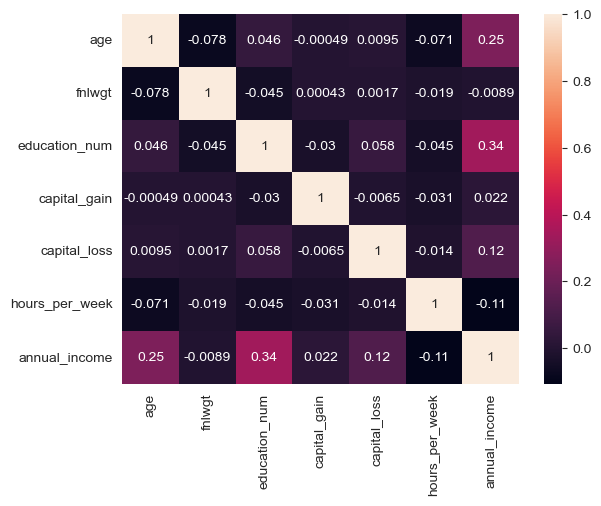

In [127]:
sns.heatmap(df.corr(), annot=True)

In [128]:
#convert categorical columns  to intger type 
#use Label encoder for encoding the data

In [129]:
df.columns
for col in df.columns:
    if df[col].dtype=="object":
        df[col]=le.fit_transform(df[col])

# The final dataset looks something like –

In [130]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,1,77516.0,1,13,1,0,1,3,1,1,1,0,38,0
1,50,2,83311.0,1,13,0,3,0,3,1,1,1,3,38,0
2,38,2,215646.0,2,9,2,5,1,3,1,1,1,0,38,0
3,53,2,234721.0,5,7,0,5,0,1,1,1,1,0,38,0
4,28,2,338409.0,1,13,0,9,2,1,0,1,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302.0,0,12,0,12,2,3,0,1,1,3,38,0
32557,40,2,154374.0,2,9,0,6,0,3,1,1,1,0,38,1
32558,58,2,151910.0,2,9,2,0,1,3,0,1,1,0,38,0
32559,22,2,201490.0,2,9,1,0,1,3,1,1,1,3,38,0


# Scaling the data

In [131]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [132]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,annual_income
0,39,1,77516.0,1,13,1,0,1,3,1,1,1,0,38,0
1,50,2,83311.0,1,13,0,3,0,3,1,1,1,3,38,0
2,38,2,215646.0,2,9,2,5,1,3,1,1,1,0,38,0
3,53,2,234721.0,5,7,0,5,0,1,1,1,1,0,38,0
4,28,2,338409.0,1,13,0,9,2,1,0,1,1,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302.0,0,12,0,12,2,3,0,1,1,3,38,0
32557,40,2,154374.0,2,9,0,6,0,3,1,1,1,0,38,1
32558,58,2,151910.0,2,9,2,0,1,3,0,1,1,0,38,0
32559,22,2,201490.0,2,9,1,0,1,3,1,1,1,3,38,0


In [133]:
x=df.iloc[:,:-1]
y=df['annual_income']

# 2. Use various machine learning algorithms to predict the response variable.


In [134]:
#importing necessary models

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [135]:
#Creating instances for classification models
dt = DecisionTreeClassifier
lg = LogisticRegression
rf = RandomForestClassifier
knn = KNeighborsClassifier
ad = AdaBoostClassifier

In [136]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [137]:
# Define your models (adjust hyperparameters as needed)
models = [
   ("Decision Tree", DecisionTreeClassifier(random_state=42)),
   ("Logistic Regression", LogisticRegression(random_state=42)),
   ("Random Forest", RandomForestClassifier(n_estimators=300, random_state=42)),
   ("KNN", KNeighborsClassifier()),
    ("AdaBoost", AdaBoostClassifier(random_state=42)),
]

for name, model in models:
   # Train the model
   model.fit(X_train, y_train)

   # Make predictions on the test set
   y_pred = model.predict(X_test)

   # Evaluate performance
   print(f"\n{name}:")
   print("Accuracy of train data:", accuracy_score(y_test, y_pred))
   print("Accuracy of test data:", accuracy_score(y_train,model.predict(X_train)))
   print("Classification Report:")
   print(classification_report(y_test, y_pred))
   print("Confusion Matrix:")
   print(confusion_matrix(y_test, y_pred))



Decision Tree:
Accuracy of train data: 0.7973899579738996
Accuracy of test data: 0.9999051997914395
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      6749
           1       0.60      0.59      0.60      2293

    accuracy                           0.80      9042
   macro avg       0.73      0.73      0.73      9042
weighted avg       0.80      0.80      0.80      9042

Confusion Matrix:
[[5846  903]
 [ 929 1364]]

Logistic Regression:
Accuracy of train data: 0.7464056624640566
Accuracy of test data: 0.752903256387164
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.85      6749
           1       0.00      0.00      0.00      2293

    accuracy                           0.75      9042
   macro avg       0.37      0.50      0.43      9042
weighted avg       0.56      0.75      0.64      9042

Confusion Matrix:
[[6749    0]
 [2293    0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Random Forest:
Accuracy of train data: 0.8410749834107498
Accuracy of test data: 0.9999051997914395
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      6749
           1       0.72      0.61      0.66      2293

    accuracy                           0.84      9042
   macro avg       0.80      0.77      0.78      9042
weighted avg       0.84      0.84      0.84      9042

Confusion Matrix:
[[6200  549]
 [ 888 1405]]

KNN:
Accuracy of train data: 0.7092457420924574
Accuracy of test data: 0.7961321514907332
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.88      0.82      6749
           1       0.36      0.19      0.25      2293

    accuracy                           0.71      9042
   macro avg       0.56      0.54      0.54      9042
weighted avg       0.66      0.71      0.68      9042

Confusion Matrix:
[[5968  781]
 [1848  445]]

AdaBoost:
Accurac

We see that theAdaBoostClassifier gives us an accuracy of ~85% , and the f1-score, recall and precision scores also improve. Hence we choose ‘AdaBoostClassifierr’ as our final model, 

In [138]:
predicated_values = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [139]:
predicated_values

,Actual,Predicted
9395,0,0
3393,0,0
17020,0,0
6191,0,0
465,0,0
...,...,...
15937,0,0
29346,0,0
4225,0,0
28066,0,0
